# Laboratory 4 - B

**Santiago Álvarez Sepúlveda**

**E-mail:** saalvarezse@unal.edu.co

---

* Write a  Notebook following the examples form “Linear Regression in Python – Thomas J. Sargent and  John Stachurski – [Lectures in Quantitative Economics](https://lectures.quantecon.org/py/ols.html).
* Publish this work in your Github account.

## Simple Linear Regression


Suppose we wish to determine whether or not differences in institutions can help to explain observed economic outcomes.

How do we measure institutional differences and economic outcomes?

 * Economic outcomes are proxied by log GDP per capita in 1995, adjusted for exchange rates.
 * Institutional differences are proxied by an index of protection against expropriation on average over 1985-95, constructed by the [Political Risk Services Group](https://www.prsgroup.com/)

These variables and other data used in the paper are available for download on Daron Acemoglu’s [webpage](https://economics.mit.edu/faculty/acemoglu/data/ajr2001)

We will use pandas’ `.read_stata()` function to read in data contained in the `.dta` files to dataframes

In [29]:
import pandas as pd

df1 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable1.dta')
df1.head()

,shortnam,euro1900,excolony,avexpr,logpgp95,cons1,cons90,democ00a,cons00a,extmort4,logem4,loghjypl,baseco
0,AFG,0.000000,1.0,NaN,NaN,1.0,2.0,1.0,1.0,93.699997,4.540098,NaN,NaN
1,AGO,8.000000,1.0,5.363636,7.770645,3.0,3.0,0.0,1.0,280.000000,5.634789,-3.411248,1.0
2,ARE,0.000000,1.0,7.181818,9.804219,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ARG,60.000004,1.0,6.386364,9.133459,1.0,6.0,3.0,3.0,68.900002,4.232656,-0.872274,1.0
4,ARM,0.000000,0.0,NaN,7.682482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let’s use a scatterplot to see whether any obvious relationship exists between GDP per capita and the protection against expropriation index

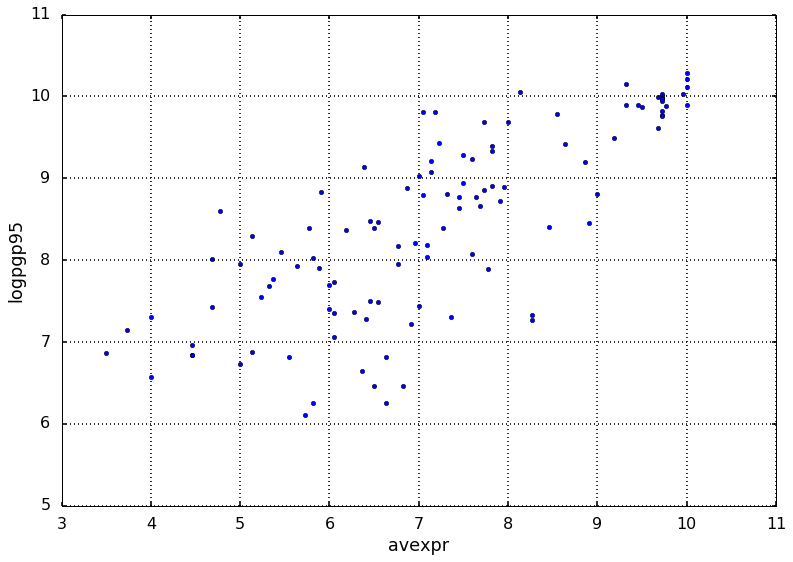

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-poster')

df1.plot(x='avexpr', y='logpgp95', kind='scatter')
plt.grid()
plt.show()

The plot shows a fairly strong positive relationship between protection against expropriation and log GDP per capita.

Specifically, if higher protection against expropriation is a measure of institutional quality, then better institutions appear to be positively correlated with better economic outcomes (higher GDP per capita)

Given the plot, choosing a linear model to describe this relationship seems like a reasonable assumption

We can write our model as

$$logpgp95_i = \beta_0 + \beta_1 avexpr_i + u_i$$

where:

* $\beta_0$ is the intercept of the linear trend line on the y-axis
* $\beta_1$ is the slope of the linear trend line, representing the marginal effect of protection against risk on log GDP per capita
* $u_i$ is a random error term (deviations of observations from the linear trend due to factors not included in the model)

Visually, this linear model involves choosing a straight line that best fits the data, as in the following plot 

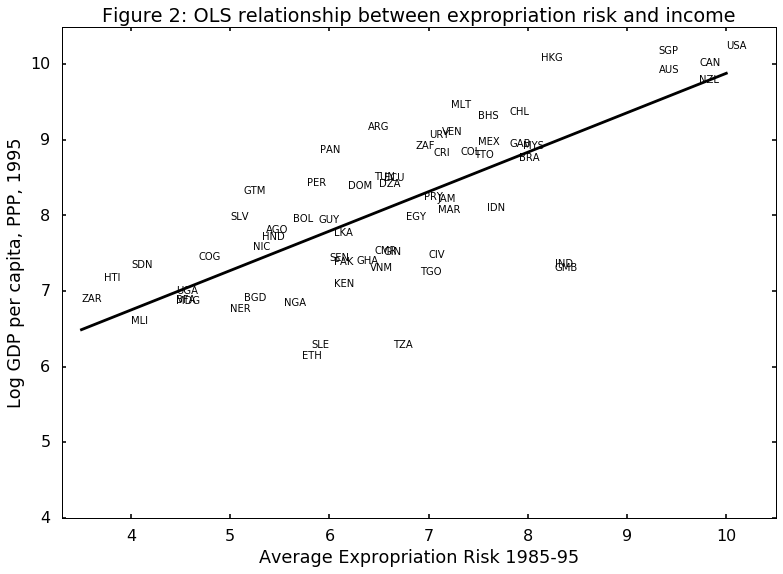

In [31]:
import numpy as np

# Dropping NA's is required to use numpy's polyfit
df1_subset = df1.dropna(subset=['logpgp95', 'avexpr'])
# Use only 'base sample' for plotting purposes
df1_subset = df1_subset[df1_subset['baseco'] == 1]

X = df1_subset['avexpr']
y = df1_subset['logpgp95']
labels = df1_subset['shortnam']

# Replace markers with country labels
plt.scatter(X, y, marker='')
for i, label in enumerate(labels):
    plt.annotate(label, (X.iloc[i], y.iloc[i]))

# Fit a linear trend line
plt.plot(np.unique(X),np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),color='black')
plt.xlim([3.3,10.5])
plt.ylim([4,10.5])
plt.xlabel('Average Expropriation Risk 1985-95')
plt.ylabel('Log GDP per capita, PPP, 1995')
plt.title('Figure 2: OLS relationship between expropriation risk and income')
plt.show()

The most common technique to estimate the parameters ($\beta$‘s) of the linear model is Ordinary Least Squares (OLS)

As the name implies, an OLS model is solved by finding the parameters that minimize the sum of squared residuals, ie.

$$\min_{\hat{\beta}} \sum_{i=1}^{N} \hat{u_i}^{2}$$

where $\hat{u_i}$ is the difference between the observation and the predicted value of the dependent variable.

To estimate the constant term $\beta_0$, we need to add a column of 1’s to our dataset (consider the equation if $\beta_0$ was replaced with $\beta_0 x_i$ and $x_i = 1$)

In [32]:
df1['const'] = 1

Now we can construct our model in `statsmodels` using the OLS function.

We will use `pandas` dataframes with `statsmodels`, however standard arrays can also be used as arguments.


In [33]:
import statsmodels.api as sm

reg1 = sm.OLS(endog=df1['logpgp95'], exog=df1[['const', 'avexpr']], missing='drop')
type(reg1)

statsmodels.regression.linear_model.OLS

So far we have simply constructed our model.

We need to use `.fit()` to obtain parameter estimates $\beta_0$ and $\beta_1$.

In [34]:
results = reg1.fit()
type(results)

statsmodels.regression.linear_model.RegressionResultsWrapper

We now have the fitted regression model stored in `results`.

To view the OLS regression results, we can call the `.summary()` method

Note that an observation was mistakenly dropped from the results in the original paper (see the note located in maketable2.do from Acemoglu’s webpage), and thus the coefficients differ slightly.

In [35]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.611
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     171.4
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           4.16e-24
Time:                        11:24:15   Log-Likelihood:                -119.71
No. Observations:                 111   AIC:                             243.4
Df Residuals:                     109   BIC:                             248.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6261      0.301     15.391      0.0

From our results, we see that

 * The intercept $\beta_0 = 4.63$.
 * The slope $\beta_1 = 0.53$.
 * The positive $\beta_1$ parameter estimate implies that institutional quality has a positive effect on economic outcomes, as we saw in the figure.
 * The p-value of $0.000$ for $\beta_1$ implies that the effect of institutions on GDP is statistically significant (using $p < 0.05$ as a rejection rule).
 * The R-squared value of $0.611$ indicates that around 61% of variation in log GDP per capita is explained by protection against expropriation.

Using our parameter estimates, we can now write our estimated relationship as

$$\hat{logpgp95_i} = 4.63 + 0.53 avexpr_i$$



This equation describes the line that best fits our data, as shown in Figure 2

We can use this equation to predict the level of log GDP per capita for a value of the index of expropriation protection

For example, for a country with an index value of 7.07 (the average for the dataset), we find that their predicted level of log GDP per capita in 1995 is 8.38

In [36]:
mean_expr = np.mean(df1_subset['avexpr'])
mean_expr

6.515625

In [37]:
predicted_logpdp95 = 4.63 + 0.53 * 7.07
predicted_logpdp95

8.3771

An easier (and more accurate) way to obtain this result is to use `.predict()` and set $constant = 1$ and $avexpr_i = mean_expr$

In [38]:
results.predict(exog=[1, mean_expr])

array([8.09156367])

We can obtain an array of predicted $logpgp95_i$ for every value of $avexpr_i$ in our dataset by calling `.predict()` on our results.

Plotting the predicted values against $avexpr_i$ shows that the predicted values lie along the linear line that we fitted above.

The observed values of $logpgp95_i$ are also plotted for comparison purposes.

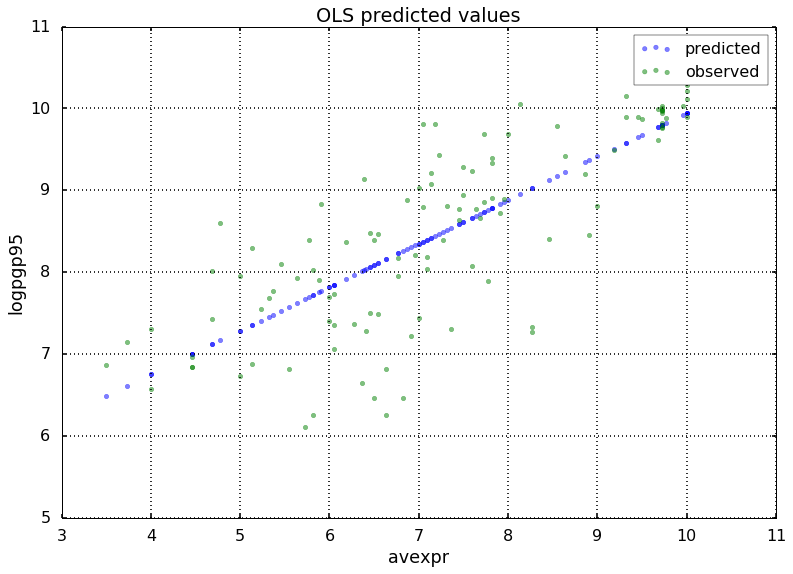

In [39]:
# Drop missing observations from whole sample
df1_plot = df1.dropna(subset=['logpgp95', 'avexpr'])

# Plot predicted values
plt.scatter(df1_plot['avexpr'], results.predict(), color='blue', alpha=0.5, label='predicted')
# Plot observed values
plt.scatter(df1_plot['avexpr'], df1_plot['logpgp95'], color='green', alpha=0.5, label='observed')
plt.legend()
plt.title('OLS predicted values')
plt.xlabel('avexpr')
plt.ylabel('logpgp95')
plt.grid()
plt.show()

## Extending the Linear Regression Model

So far we have only accounted for institutions affecting economic performance - almost certainly there are numerous other factors affecting GDP that are not included in our model.

Leaving out variables that affect $logpgp95_i$ will result in **omitted variable bias**, yielding biased and inconsistent parameter estimates.

We can extend our bivariate regression model to a **multivariate regression model** by adding in other factors that may affect $logpgp95_i$

Let's consider other factors such as:
 * The effect of climate on economic outcomes; latitude is used to proxy this.
 * Differences that affect both economic performance and institutions, eg. cultural, historical, etc.; controlled for with the use of continent dummies

Let’s estimate some of the extended models considered using data from  `maketable2.dta`

In [40]:
df2 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable2.dta')

# Add constant term to dataset
df2['const'] = 1

# Create lists of variables to be used in each regression
X1 = ['const', 'avexpr']
X2 = ['const', 'avexpr', 'lat_abst']
X3 = ['const', 'avexpr', 'lat_abst', 'asia', 'africa', 'other']

# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(df2['logpgp95'], df2[X1], missing='drop').fit()
reg2 = sm.OLS(df2['logpgp95'], df2[X2], missing='drop').fit()
reg3 = sm.OLS(df2['logpgp95'], df2[X3], missing='drop').fit()

Now that we have fitted our model, we will use `summary_col` to display the results in a single table.

In [41]:
from statsmodels.iolib.summary2 import summary_col

info_dict={'R-squared' : lambda x: x.rsquared,
           'No. observations' : lambda x: int(x.nobs)}

results_table = summary_col(results=[reg1,reg2,reg3],
                            float_format='%0.2f',
                            stars = True,
                            model_names=['Model 1',
                                         'Model 3',
                                         'Model 4'],
                            info_dict=info_dict,
                            regressor_order=['const',
                                             'avexpr',
                                             'lat_abst',
                                             'asia',
                                             'africa'])

results_table.add_title('Table 2 - OLS Regressions')
print(results_table)

         Table 2 - OLS Regressions
                 Model 1  Model 3  Model 4 
-------------------------------------------
const            4.63***  4.87***  5.85*** 
                 (0.30)   (0.33)   (0.34)  
avexpr           0.53***  0.46***  0.39*** 
                 (0.04)   (0.06)   (0.05)  
lat_abst                  0.87*    0.33    
                          (0.49)   (0.45)  
asia                               -0.15   
                                   (0.15)  
africa                             -0.92***
                                   (0.17)  
other                              0.30    
                                   (0.37)  
No. observations 111.0000 111.0000 111.0000
R-squared        0.6113   0.6225   0.7152  
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


## Endogenity

The OLS models likely suffer from endogeneity issues, resulting in biased and inconsistent model estimates.

Namely, there is likely a two-way relationship between institutions and economic outcomes:

 * Richer countries may be able to afford or prefer better institutions.
 * Variables that affect income may also be correlated with institutional differences.
 * The construction of the index may be biased; analysts may be biased towards seeing countries with higher income having better institutions.

To deal with endogeneity, we can use **two-stage least squares (2SLS) regression**, which is an extension of OLS regression

This method requires replacing the endogenous variable $avexpr_i$ with a variable that is:

 1. correlated with $avexpr_i$.
 2. not correlated with the error term (ie. it should not directly affect the dependent variable, otherwise it would be correlated with $u_i$ due to omitted variable bias).

The new set of regressors is called an **instrument**, which aims to remove endogeneity in our proxy of institutional differences.

The main contribution of [AJR01](https://lectures.quantecon.org/py/zreferences.html#acemoglu2001) is the use of settler mortality rates to instrument for institutional differences

They hypothesize that higher mortality rates of colonizers led to the establishment of institutions that were more extractive in nature (less protection against expropriation), and these institutions still persist today

Using a scatterplot (Figure 3 in [AJR01](https://lectures.quantecon.org/py/zreferences.html#acemoglu2001)), we can see protection against expropriation is negatively correlated with settler mortality rates, coinciding with the authors’ hypothesis and satisfying the first condition of a valid instrument

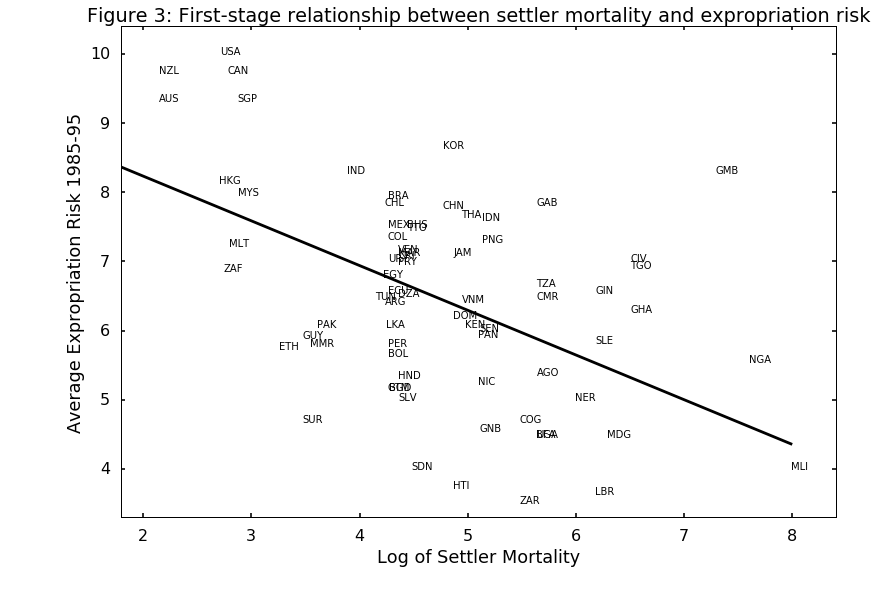

In [42]:
# Dropping NA's is required to use numpy's polyfit
df1_subset2 = df1.dropna(subset=['logem4', 'avexpr'])

X = df1_subset2['logem4']
y = df1_subset2['avexpr']
labels = df1_subset2['shortnam']

# Replace markers with country labels
plt.scatter(X, y, marker='')

for i, label in enumerate(labels):
    plt.annotate(label, (X.iloc[i], y.iloc[i]))

# Fit a linear trend line
plt.plot(np.unique(X),
         np.poly1d(np.polyfit(X, y, 1))(np.unique(X)),
         color='black')

plt.xlim([1.8,8.4])
plt.ylim([3.3,10.4])
plt.xlabel('Log of Settler Mortality')
plt.ylabel('Average Expropriation Risk 1985-95')
plt.title('Figure 3: First-stage relationship between settler mortality and expropriation risk')
plt.show()

The second condition may not be satisfied if settler mortality rates in the 17th to 19th centuries have a direct effect on current GDP (in addition to their indirect effect through institutions).

For example, settler mortality rates may be related to the current disease environment in a country, which could affect current economic performance.

[AJR01](https://lectures.quantecon.org/py/zreferences.html#acemoglu2001) argue this is unlikely because:

 * The majority of settler deaths were due to malaria and yellow fever, and had limited effect on local people
 * The disease burden on local people in Africa or India, for example, did not appear to be higher than average, supported by relatively high population densities in these areas before colonization

As we appear to have a valid instrument, we can use 2SLS regression to obtain consistent and unbiased parameter estimates.

**First stage**

The first stage involves regressing the endogenous variable ($avexpr_i$) on the instrument.

The instrument is the set of all exogenous variables in our model (and not just the variable we have replaced).

Using model 1 as an example, our instrument is simply a constant and settler mortality rates $logem4_i$

Therefore, we will estimate the first-stage regression as

$$avexpr_i = \delta_0 + \delta_1 logem4_i + v_i$$

The data we need to estimate this equation is located in `maketable4.dta` (only complete data, indicated by `baseco = 1`, is used for estimation).


In [43]:
# Import and select the data
df4 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable4.dta')
df4 = df4[df4['baseco'] == 1]

# Add a constant variable
df4['const'] = 1

# Fit the first stage regression and print summary
results_fs = sm.OLS(df4['avexpr'],
                    df4[['const', 'logem4']],
                    missing='drop').fit()
print(results_fs.summary())

                            OLS Regression Results                            
Dep. Variable:                 avexpr   R-squared:                       0.270
Model:                            OLS   Adj. R-squared:                  0.258
Method:                 Least Squares   F-statistic:                     22.95
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           1.08e-05
Time:                        11:24:28   Log-Likelihood:                -104.83
No. Observations:                  64   AIC:                             213.7
Df Residuals:                      62   BIC:                             218.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3414      0.611     15.296      0.0

**Second stage**

We need to retrieve the predicted values of $avexpr_i$ using `.predict()`

We then replace the endogenous variable $avexpr_i$ with the predicted values $\hat{avexpr_i}$ in the original linear model.

Our second stage regression is thus

$$logpgp95_i = \beta_0 + \beta_1 \hat{avexpr_i} + u_i$$

In [44]:
df4['predicted_avexpr'] = results_fs.predict()

results_ss = sm.OLS(df4['logpgp95'],
                    df4[['const', 'predicted_avexpr']]).fit()
print(results_ss.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.469
Method:                 Least Squares   F-statistic:                     56.60
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           2.66e-10
Time:                        11:24:29   Log-Likelihood:                -72.268
No. Observations:                  64   AIC:                             148.5
Df Residuals:                      62   BIC:                             152.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                1.9097      0.823  

The second-stage regression results give us an unbiased and consistent estimate of the effect of institutions on economic outcomes.

The result suggests a stronger positive relationship than what the OLS results indicated.

Note that while our parameter estimates are correct, our standard errors are not and for this reason, computing 2SLS ‘manually’ (in stages with OLS) is not recommended.

We can correctly estimate a 2SLS regression in one step using the [linearmodels](https://github.com/bashtage/linearmodels) package, an extension of `statsmodels`.

To install this package, you will need to run `pip install linearmodels` in your command line.

In [45]:
from linearmodels.iv import IV2SLS

SyntaxError: invalid syntax (model.py, line 137)

Note that when using `IV2SLS`, the exogenous and instrument variables are split up in the function arguments (whereas before the instrument included exogenous variables)

In [46]:
iv = IV2SLS(dependent=df4['logpgp95'],
            exog=df4['const'],
            endog=df4['avexpr'],
            instruments=df4['logem4']).fit(cov_type='unadjusted')

print(iv.summary)

NameError: name 'IV2SLS' is not defined

Given that we now have consistent and unbiased estimates, we can infer from the model we have estimated that institutional differences (stemming from institutions set up during colonization) can help to explain differences in income levels across countries today

[AJR01](https://lectures.quantecon.org/py/zreferences.html#acemoglu2001) use a marginal effect of 0.94 to calculate that the difference in the index between Chile and Nigeria (ie. institutional quality) implies up to a 7-fold difference in income, emphasizing the significance of institutions in economic development

## Summary

We have demonstrated basic OLS and 2SLS regression in `statsmodels` and `linearmodels`

If you are familiar with R, you may want use the [formula interface](http://www.statsmodels.org/dev/example_formulas.html) to statsmodels, or consider using [r2py](https://rpy2.bitbucket.io/) to call R from within Python.

## Exercises

### Exercise 1

In the lecture, we think the original model suffers from endogeneity bias due to the likely effect income has on institutional development.

Although endogeneity is often best identified by thinking about the data and model, we can formally test for endogeneity using the **Hausman test**.

We want to test for correlation between the endogenous variable, $avexpr_i$, and the errors, $ui$.

$$ H_0 : Cov(avexpr_i, u_i) = 0 (no endogeneity)$$
$$ H_1 : Cov(avexpr_i, u_i) \ne 0 (endogeneity)$$

This test is run is two stages.

First, we regress $avexpr_i$ on the instrument, $logem4_i$

$$avexpr_i = \pi_0 + \pi_1 logem4_i + υ_i$$

Second, we retrieve the residuals $\hat{v_i}$ and include them in the original equation.

$$logpgp95_i= \beta_0 + \beta_1 avexpr_i + \alpha \hat{v_i} + u_i$$

If $\alpha$ is statistically significant (with a p-value < 0.05), then we reject the null hypothesis and conclude that $avexpr_i$ is endogenous.

Using the above information, estimate a Hausman test and interpret your results.

In [47]:
# Load in data
df4 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable4.dta')

# Add a constant term
df4['const'] = 1

# Estimate the first stage regression
reg1 = sm.OLS(endog=df4['avexpr'],
              exog=df4[['const', 'logem4']],
              missing='drop').fit()

# Retrieve the residuals
df4['resid'] = reg1.resid

# Estimate the second stage residuals
reg2 = sm.OLS(endog=df4['logpgp95'],
              exog=df4[['const', 'avexpr', 'resid']],
              missing='drop').fit()

print(reg2.summary())

                            OLS Regression Results                            
Dep. Variable:               logpgp95   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     74.05
Date:                Mon, 10 Dec 2018   Prob (F-statistic):           1.07e-17
Time:                        11:24:34   Log-Likelihood:                -62.031
No. Observations:                  70   AIC:                             130.1
Df Residuals:                      67   BIC:                             136.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4782      0.547      4.530      0.0

The output shows that the coefficient on the residuals is statistically significant, indicating $avexpr_i$ is endogenous

### Exercise 2

The OLS parameter $\beta$ can also be estimated using matrix algebra and `numpy` (you may need to review the [numpy](https://lectures.quantecon.org/py/numpy.html) lecture to complete this exercise).

The linear equation we want to estimate is (written in matrix form)

$$y = X \beta + u$$

To solve for the unknown parameter $\beta$, we want to minimise the sum of squared residuals

$$\min_{\hat{\beta}} \hat{u}′ \hat{u}$$

Rearranging the first equation and substituting into the second equation, we can write

$$\min_{\hat{\beta}} (Y−X\hat{\beta})′(Y−X\hat{\beta})$$

Solving this optimization problem gives the solution for the $\hat{\beta}$ coefficients

$$\hat{\beta}=(X′X)^{-1} X′y$$

Using the above information, compute $\hat{\beta}$ from model 1 using `numpy` - your results should be the same as those in the `statsmodels` output from earlier in the lecture.

In [48]:
# Load in data
df1 = pd.read_stata('https://github.com/QuantEcon/QuantEcon.lectures.code/raw/master/ols/maketable1.dta')
df1 = df1.dropna(subset=['logpgp95', 'avexpr'])

# Add a constant term
df1['const'] = 1

# Define the X and y variables
y = np.asarray(df1['logpgp95'])
X = np.asarray(df1[['const', 'avexpr']])

# Compute b_hat
b_hat = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))

# Print out the results from the 2 x 1 vector β_hat
print('b0 = %.2f'%(b_hat[0]))
print('b1 = %.2f'%(b_hat[1]))

b0 = 4.63
b1 = 0.53


It is also possible to use `np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))` to solve for $\beta$, however `.solve()` is preferred as it involves fewer computations.